# Single Neuron Percpetron
___
A single-neuron perceptron is a simple binary classifier in machine learning. It functions as follows:

1. The perceptron receives input features $x_1, x_2, ..., x_n$ and associated weights $w_1, w_2, ..., w_n$.

2. It calculates the weighted sum of inputs: $z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$, where $b$ is the bias term.

3. The output is determined by an activation function $f(z)$, typically a step function:
   $$
   f(z) = \begin{cases}
   1 & \text{if } z > 0 \\
   0 & \text{otherwise}
   \end{cases}
   $$

4. During training, weights are adjusted to minimize classification errors.

Benefits:
- Simple and computationally efficient
- Effective for linearly separable data
- Can perform basic logic operations like AND, OR, and NOT

Limitations:
- Can only classify linearly separable data
- Limited to binary classification
- Unable to solve complex problems like XOR
- Cannot handle non-linear decision boundaries

The perceptron's simplicity makes it a foundational model in neural networks, but its limitations led to the development of more advanced architectures.
___

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from em_el.classifiers import PerceptronClassifier

In [3]:
# Load Data
penguins = sns.load_dataset('penguins')
print("# Observations: ", len(penguins))
print("Classes: ", penguins['species'].unique())

# Observations:  344
Classes:  ['Adelie' 'Chinstrap' 'Gentoo']


In [4]:
# Get only desired species and features
df = penguins[penguins['species'] != 'Chinstrap'].dropna()  # Remove the Chinstrap penguins
df_clean = df[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
gentoo = df_clean[df_clean.species == 'Gentoo']
adelie = df_clean[df_clean.species == 'Adelie']

print("Gentoo Shape: ", gentoo.shape)
print("Adelie Shape: ", adelie.shape)

Gentoo Shape:  (119, 5)
Adelie Shape:  (146, 5)


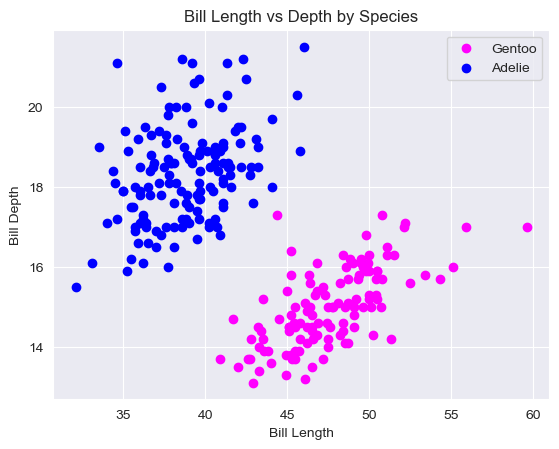

In [5]:
plt.scatter(gentoo.bill_length_mm, gentoo.bill_depth_mm, color="magenta", label="Gentoo")
plt.scatter(adelie.bill_length_mm, adelie.bill_depth_mm, color="blue", label="Adelie")

plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Bill Length vs Depth by Species')
plt.legend()
plt.show()

In [6]:
X = df_clean[['bill_length_mm', 'bill_depth_mm']].to_numpy()
y = df_clean['species'].to_numpy()
y = np.where(y == 'Gentoo', -1.0, 1.0).reshape(-1, 1)

print(f"X shape {X.shape}")
print(f"y shape {y.shape}")

# Scale Data
X = StandardScaler().fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X shape (265, 2)
y shape (265, 1)


In [7]:
percep = PerceptronClassifier()
percep.train(X_train, y_train, epochs=1000, alpha=0.001)

In [8]:
y_hat = percep.predict(X_test)

In [9]:
percep.model_errors

[0.6464646464646465,
 0.47474747474747475,
 0.3434343434343434,
 0.21212121212121213,
 0.1414141414141414,
 0.1111111111111111,
 0.08080808080808081,
 0.0707070707070707,
 0.0707070707070707,
 0.06060606060606061,
 0.04040404040404041,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


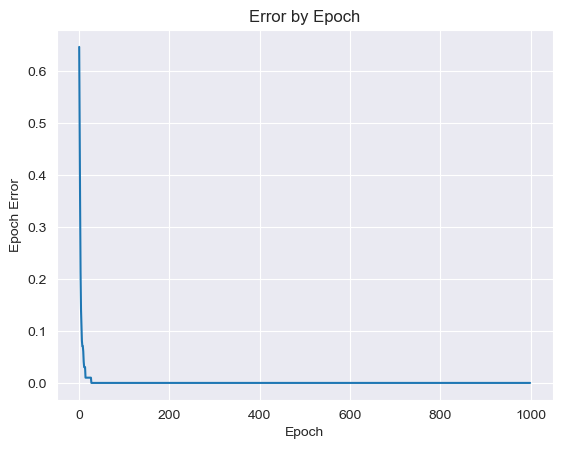

In [10]:
plt.plot(percep.model_errors)
plt.xlabel("Epoch")
plt.ylabel("Epoch Error")
plt.title("Error by Epoch")
plt.show()

In [11]:
clf_rep = classification_report(y_test, y_hat)
print("Classification Report: \n", clf_rep)

Classification Report: 
               precision    recall  f1-score   support

        -1.0       1.00      0.93      0.96        28
         1.0       0.95      1.00      0.97        39

    accuracy                           0.97        67
   macro avg       0.98      0.96      0.97        67
weighted avg       0.97      0.97      0.97        67

